## In this kernel, I will explore the Spotify 2019 Top 50 list with EDA questions and try to use visualizations to answer them.

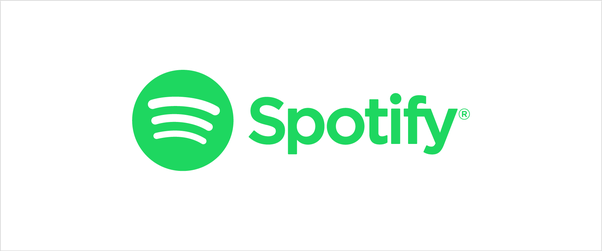

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

### Please give me an *upvote* if you enjoy the data processing and visualizations.

## 1. Import the datasets first with encoding of "ISO-8859-1"

In [ ]:
top_musics = pd.read_csv("../input/top50spotify2019/top50.csv",encoding="ISO-8859-1")
top_musics.head()

## Here are the descriptions of the columns we got.
0. Index as column. *I am going to drop this*

### Categorical with texts as input
1. Track.Name: Name of the Track
2. Artist.Name: Name of the Artist
3. Genre: the genre of the track

### Numeric with numbers as input
4. Beats.Per.Minute: The tempo of the song.
5. Energy: The energy of a song - the higher the value, the more energtic the song is.
6. Danceability: The higher the value, the easier it is to dance to this song.
7. Loudness..dB..: The higher the value, the louder the song.
8. Liveness: The higher the value, the more likely the song is a live recording.
9. Valence.: The higher the value, the more positive mood for the song.
10. Length.: The duration of the song.
11. Acousticness..: The higher the value the more acoustic the song is.
12. Speechiness.: The higher the value the more spoken word the song contains.
13. Popularity: The higher the value the more popular the song is.

### What's next:
Let's drop the first column and rename the columns to increase the readibility.
Then, I will check the data quality and sort the table based on song popularity!

## 2. Data Preprocessing for visualizations

In [ ]:
# not include the 1st colmun now
top_musics = top_musics[top_musics.columns[1:]]
top_musics.head()

In [ ]:
# standardize the names of the column to increase readibility and accessibility
top_musics.columns = ['Track Name', 'Artist Name', 'Genre', 'Beats per Minute', 'Energy',
       'Danceability', 'Loudness (dB)', 'Liveness', 'Valence', 'Length',
       'Acousticness', 'Speechiness', 'Popularity']
top_musics.head()

In [ ]:
# my personal reusable function for detecting missing data
def missing_value_describe(data):
    # check missing values in the data
    missing_value_stats = (data.isnull().sum() / len(data)*100)
    missing_value_col_count = sum(missing_value_stats > 0)
    missing_value_stats = missing_value_stats.sort_values(ascending=False)[:missing_value_col_count]
    print("Number of columns with missing values:", missing_value_col_count)
    if missing_value_col_count != 0:
        # print out column names with missing value percentage
        print("\nMissing percentage (desceding):")
        print(missing_value_stats)
    else:
        print("No missing data!!!")
missing_value_describe(top_musics)

Great, we have no missing data.

In [ ]:
# sort the table based on the popularity
top_musics = top_musics.sort_values(by=['Popularity'])
top_musics.head()

## 3. Data Exploratory: let's ask interesting questions and answer them with data!

### EDA Q1: What does the artists' track(s) scores look like?

In [ ]:
artist_contribution = top_musics[["Artist Name","Genre", "Popularity"]]

import plotly.express as px
fig = px.box(top_musics, x="Artist Name", y="Popularity")
fig.update_layout(
    title_text = "Top 50 Tracks Popularity Range by Artist (Hover Chart Markers to Interact)",
    xaxis=dict(
        tickangle=45
    )
)
fig.show()

In [ ]:
fig = px.scatter(top_musics, x="Artist Name", y="Popularity", color="Genre", hover_name="Track Name")
fig.update_layout(
    title_text = "Top 50 Tracks Popularity by Artist and Genre (Hover to See the Song Name)",
    xaxis=dict(tickangle=45)
)
print("The legend on the right is also clickable. Try single clicks and also double clicks!")
fig.show()

#### From the above box plot, we can observer there are 21 genres and 9 artists having multiple tracks listed in the Spotify Top 50 Tracks Chart. They are Shawn Mendes, Ed Sheeran, The Chainsmokers, Ariana Grande, Lil Nas X, Sech, Billie Elish, J Balvin, and Post Malone.


There seems to be many "dance pop" and "pop" musics. Let's take a look at the range of genre popularity.

In [ ]:
fig = px.box(top_musics, x="Genre", y="Popularity")
fig.update_layout(
    title_text = "Top 50 Tracks' Genre Popularity (Hover Chart Markers to Interact)",
    xaxis=dict(tickangle=45)
)
fig.show()

### Based on the genre with multiple entries, dance pop has the highest difference between the min and max score followed by reggaetwon flow and canadian pop.
### Let's group music by artist and take the average scores of their songs if there are multiple tracksfor one artist. Then, we plot the scores for each artist. 

In [ ]:
# group by artist and take the average in one single line
top_musics_mean = top_musics.groupby("Artist Name").mean()
top_musics_mean.reset_index(level=0, inplace=True) # set index as column
top_musics_mean = top_musics_mean.sort_values(by=['Popularity']) # sort rows by popularity
top_musics_mean.head()
top_musics_mean.head()

In [ ]:
len(top_musics_mean["Artist Name"])

In [ ]:
# let's take a look at the popularity first
top_musics_mean["is top 10"] = [0] * (-10 + len(top_musics_mean["Artist Name"])) + [1] * 10
fig = px.bar(top_musics_mean, x="Artist Name", y="Popularity", color="is top 10")
fig.update_layout(
    title_text = "Mean Track Popularity by Artist (Hover Chart Markers to Interact)",
    xaxis=dict(tickangle=45)
)
fig.show()

### From the above bar chart, the bars show that the top 10 artists' track(s) mean popularity ranges from 91 to 93. Within the top 38 artists of the top 50 tracks, the artist with highest popularity score is Bad Bunny and the artist with lowest popularity score is Shawn Mendes.

In [ ]:
top_musics.iloc[:,3:].describe()

#### Let's take a look at the describe data generated by the pandas describe() function:
1. The mean **BPM** of music is pretty fast with 120 Beat per Minute, but it has a standard deviation of 30 with fastest music with a beat of 190 BPM and slowest music with a beat of 85 BPM. 
2. The mean **Energy** of the song is 64.06 with standard deviation of 14.23. The min Energy is 32 and max energy is 88.
3. The 50 percentile of the songs are above the mean dancibility. The max **Danceability** of the top 50 tracks is 90 and min Danceability is very low with a score of only 29.
4. From a producer's perspective, I think the **Loundness** is relative regarding to the clipping sound, which is the volume go above the speak level that makes clip noise. All the sound tracks are below the clipping point, which is pleasant to listen.
5. The 75 percentile of the tracks have really low **Liveness** score, which implies most of the songs are not recorded live. They are recorded in studio mostly.
6. The mean **Valence** is slightly above neutral emotions. The max is 95, which implies very positive music.
7. The mean **Length** is 200.96 that implies most of the songs are within 3 min and 20 seconds with standard deviation of 30 seconds difference.
8. The mean **Accousticness** is low. This data tells us most of the productions are made with electronic plugins and synths instead of recording them accoustically with real grand piano, accoustic guitar, and other physical instruments.
9. The overall **Speechinesses** are below 50. This implies most of songs are not filled with words entirely.
10. The **Popularity** has a range of 70 to 95 with low standard deviation.

### EDA Q2: How does the scores correlate to each other?

In [ ]:
correlation=top_musics.iloc[:,3:].corr(method='pearson')
correlation

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(
    data = [
        go.Heatmap(
            z=correlation, x=correlation.columns, y=correlation.index,
            hoverongaps = False
        )
    ],
    layout = go.Layout(
        title_text = "Correlations of the numeric scores of the Spotify top 50 tracks",
        autosize = True,
        width = 650,
        height = 650
    )
)
fig.show()

### From the above correlation table and the heatmap, we can observe there exist:
### More Positively correlated pairs:
1. Beats per Minute and Speechiness
2. Energy and Valence
3. Energy and Loudness

### More Negatively correlated pairs:
1. Valence and Popularity: 
2. Energy and Accousticness
3. Loudness and Speachiness

### EDA Q3: What are the distributions and proportions of each genre on the top 50 list?

In [ ]:
# calculate the number of tracks by genre
Genre_counts = top_musics["Genre"].value_counts()
Genre_counts_index = Genre_counts.index
Genre_counts, Genre_counts_index = zip(*sorted(zip(Genre_counts, Genre_counts_index)))

fig = go.Figure(
    data = go.Bar( x=Genre_counts_index, y=Genre_counts),
    layout = go.Layout(
        title_text = "Number of Tracks by Genre of the Spotify Top 50 Music List",
        yaxis = dict(title_text="Track Count"),
        xaxis = dict(title_text="Track Genre")
    )
)
fig.show()

### By genre itself, "dance pop" (8), "pop" (7), "latin" (5), "edm" (3), and "canadian hip hop" (3) have more tracks included in the spotify top 50 list.

### From the below visualizations for proportion of music by genre, the genre of "dance pop" occupies 16% of the top 50 list followed by "pop" (14%), "latin" (10%). The genres of "edm" and "canadian hip hop" both take 6% of the list.  

In [ ]:
# treemap for visualizing proportions
fig = go.Figure(
    go.Treemap(
        labels = ["Number of Tracks by Genre of the Spotify Top 50 Music List"] + list(Genre_counts_index),
        parents = [""] + ["Number of Tracks by Genre of the Spotify Top 50 Music List"] * len(Genre_counts_index),
        values = [0] + list(Genre_counts),
        textposition='middle center', # center the text
        textinfo = "label+percent parent", # show label and its percentage among the whole treemap
        textfont=dict(
            size=15 # adjust small text to larger text
        )
    )  
)
fig.show()

# radar chart for visualization the proportion
fig = go.Figure(
    go.Scatterpolar(
        r=Genre_counts,
        theta=Genre_counts_index,
        fill='toself'
    )
)
fig.update_layout(
    title_text = "Proportion of track by genre",
    title_x=0.5,
    polar=dict(radialaxis=dict(visible=True),),
    showlegend=False
)

fig.show()

### EDA Q4: What are the lengths of the song names and artist names?

In [ ]:
# sort 2 lists together
track_names = top_musics["Track Name"]
track_names = [name.split("(")[0].strip() for name in track_names] # remove the feature part of the names
track_names = [name.split("-")[0].strip() for name in track_names] # remove the feature part of the names
track_names = list(set(track_names))
for i in range(len(track_names)):
    if "Sunflower" in track_names[i]:
        track_names[i] = "Sunflower"
track_name_length = [len(track.split(" ")) for track in track_names]
track_name_length, track_names = zip(*sorted(zip(track_name_length,track_names)))

# bar plot
fig = go.Figure(
    data = go.Bar(x=track_names, y=track_name_length),
    layout = go.Layout(
        title_text = "Track Name Lengths of the Spotify Top 50 Music List",
        yaxis = dict(title_text="Name Length by Word"),
        xaxis = dict(title_text="Track Name"),
        autosize = True,
        height=600
    )
)
fig.show()

# create labels for donut chart
labels = []
for i in range(len(track_name_length)):
    if track_name_length[i] == 1:
        labels.append("1 word name")
    else:
        labels.append(str(track_name_length[i]) + " words name")
fig = go.Figure(
    data=[go.Pie(labels=labels, values=[1] * len(track_name_length), hole=.3)],
    layout = go.Layout(
        title_text = "Proportions of the Track Name Lengths of the Spotify Top 50 Music List",
    ))
fig.show()

### 37.5% of the song names have 2 words and 35.4% of the song names have 1 word only.

In [ ]:
# sort 2 lists together
artist_names = top_musics["Artist Name"]
artist_names = [name.split("(")[0].strip() for name in artist_names] # remove the feature part of the names
artist_names = [name.split("-")[0].strip() for name in artist_names] # remove the feature part of the names
artist_names = list(set(artist_names))
artist_names_length = [len(track.split(" ")) for track in artist_names]
artist_names_length, artist_names = zip(*sorted(zip(artist_names_length,artist_names)))

# bar plot
fig = go.Figure(
    data = go.Bar(x=artist_names, y=artist_names_length),
    layout = go.Layout(
        title_text = "Artist Name Lengths of the Spotify Top 50 Music List",
        yaxis = dict(title_text="Name Length by Word"),
        xaxis = dict(title_text="Artist Name"),
        autosize = True,
        height=600
    )
)
fig.show()


# create labels for donut chart
labels = []
for i in range(len(artist_names_length)):
    if artist_names_length[i] == 1:
        labels.append("1 word name")
    else:
        labels.append(str(artist_names_length[i]) + " words name")
fig = go.Figure(
    data=[go.Pie(labels=labels, values=[1] * len(artist_names_length), hole=.3)],
    layout = go.Layout(
        title_text = "Proportions of the Artist Name Lengths of the Spotify Top 50 Music List",
    ))
fig.show()

### 63.2% of the artist chose 2 words name and 31.6% of the artists have artist name with only 1 word.

## Thank you for reading all the way to here!
## Please give me an *upvote* if you enjoy the visualizations and data processing steps. 